In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("D:\\ds_projects\\concrete_compressive_strength_prediction\\notebooks\\concrete_data.csv")

In [3]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [5]:
df.isna().sum()
# No null values

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
for i in df.columns:
    print(i, len(df[i].unique()))


cement 278
blast_furnace_slag 185
fly_ash 156
water 195
superplasticizer 111
coarse_aggregate 284
fine_aggregate  302
age 14
concrete_compressive_strength 845


In [9]:
#Age can be considered as a categorical column

In [10]:
df['age'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

In [11]:
df[["concrete_compressive_strength"]]

,concrete_compressive_strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <BarContainer object of 10 artists>)

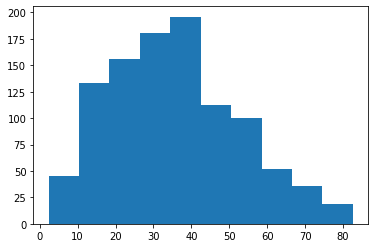

In [12]:
plt.hist(df[["concrete_compressive_strength"]])

In [13]:
def outlier_graph(data,column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title(f'{column}')

d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

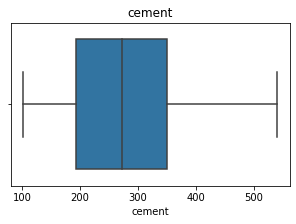

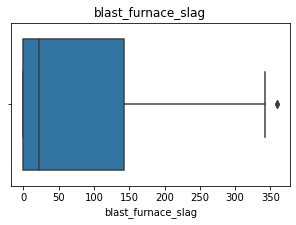

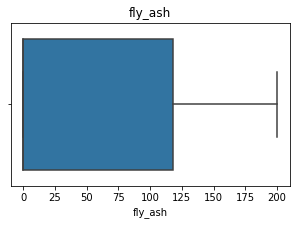

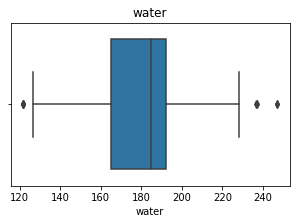

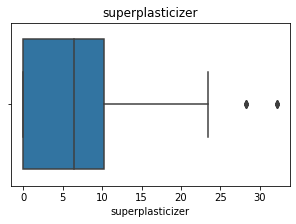

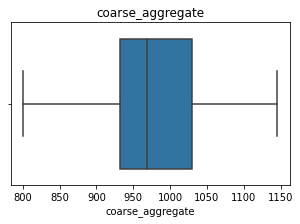

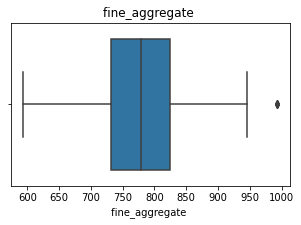

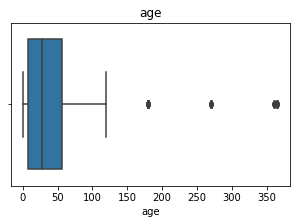

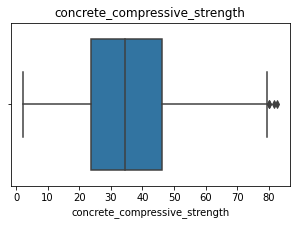

In [14]:
for i in df.columns:
    outlier_graph(df, i)

In [15]:
columns = list(df.columns)
columns

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate ',
 'age',
 'concrete_compressive_strength']

In [16]:
out_columns = ['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate ']

In [17]:
df.shape

(1030, 9)

In [18]:
for column in out_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lf = q1 - 1.5*iqr
    uf = q3 + 1.5*iqr
    df = df[(df[column]>=lf) & (df[column]<=uf)]
df.shape

(974, 9)

d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

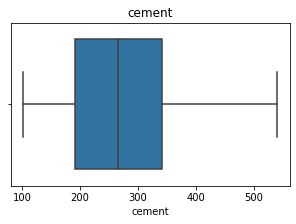

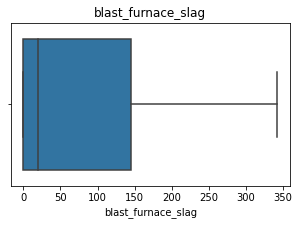

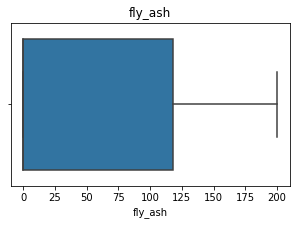

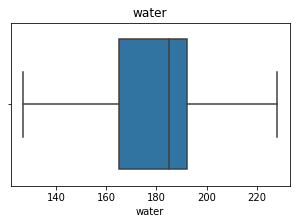

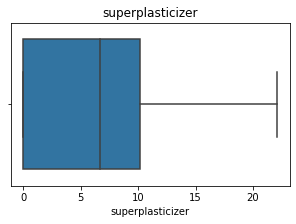

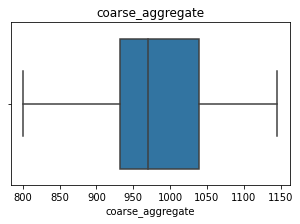

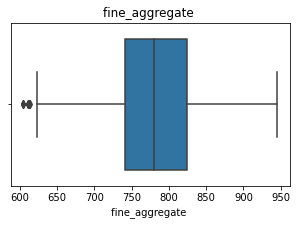

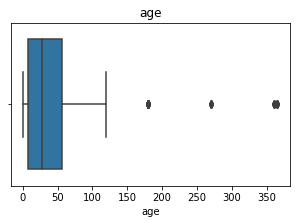

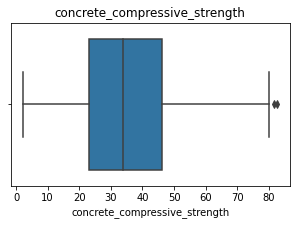

In [19]:
for i in df.columns:
    outlier_graph(df, i)

In [20]:
corr = df.corr(method='spearman')
corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.245389,-0.393108,-0.118929,0.037587,-0.100764,-0.179963,-0.018847,0.463742
blast_furnace_slag,-0.245389,1.000000,-0.251132,0.030246,0.126539,-0.356086,-0.297936,-0.028746,0.174668
fly_ash,-0.393108,-0.251132,1.000000,-0.280695,0.470441,0.018930,0.028489,0.026270,-0.052713
water,-0.118929,0.030246,-0.280695,1.000000,-0.669718,-0.217653,-0.254631,0.050388,-0.332035
superplasticizer,0.037587,0.126539,0.470441,-0.669718,1.000000,-0.203601,0.083290,0.022787,0.350337
coarse_aggregate,-0.100764,-0.356086,0.018930,-0.217653,-0.203601,1.000000,-0.133975,-0.026880,-0.157667
fine_aggregate,-0.179963,-0.297936,0.028489,-0.254631,0.083290,-0.133975,1.000000,-0.014289,-0.205446
age,-0.018847,-0.028746,0.026270,0.050388,0.022787,-0.026880,-0.014289,1.000000,0.606687
concrete_compressive_strength,0.463742,0.174668,-0.052713,-0.332035,0.350337,-0.157667,-0.205446,0.606687,1.000000


In [21]:
corr[['concrete_compressive_strength']]

,concrete_compressive_strength
cement,0.463742
blast_furnace_slag,0.174668
fly_ash,-0.052713
water,-0.332035
superplasticizer,0.350337
coarse_aggregate,-0.157667
fine_aggregate,-0.205446
age,0.606687
concrete_compressive_strength,1.000000


In [22]:
for column in df.columns:
    if np.abs(corr.loc[column,'concrete_compressive_strength']) < 0.1:
        df = df.drop(column, axis=1)
df

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
4,198.6,132.4,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,228.0,0.0,932.0,670.0,90,47.03
8,266.0,114.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,175.6,11.3,989.6,788.9,28,32.77


In [23]:
for i in df.drop('concrete_compressive_strength',axis=1).columns:
    for j in df.drop('concrete_compressive_strength',axis=1).columns:
        if not i==j:
            if corr.loc[i,j] > 0.7:
                df = df.drop(i)

df
    

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
4,198.6,132.4,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,228.0,0.0,932.0,670.0,90,47.03
8,266.0,114.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,175.6,11.3,989.6,788.9,28,32.77


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
std_scaler = StandardScaler()
X= std_scaler.fit_transform(df.drop("concrete_compressive_strength", axis=1))

In [26]:
trans_df = pd.DataFrame(np.c_[X,df['concrete_compressive_strength']], columns = df.columns)

In [27]:
trans_df

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,2.580877,-0.841319,-1.013059,-0.664913,0.824030,-1.386433,-0.253605,79.99
1,2.580877,-0.841319,-1.013059,-0.664913,1.017537,-1.386433,-0.253605,61.89
2,-0.765967,0.698007,0.595085,-1.129561,0.029361,0.653223,5.539123,44.30
3,-0.105225,0.484083,2.524858,-1.129561,-0.569221,-1.468292,0.828170,47.03
4,-0.105225,0.484083,2.524858,-1.129561,-0.569221,-1.468292,-0.253605,45.85
...,...,...,...,...,...,...,...,...
969,-0.003271,0.507335,-0.069615,0.524584,-1.367760,-0.127167,-0.253605,44.28
970,0.445720,-0.841319,0.809504,0.803372,-2.041164,0.488140,-0.253605,31.18
971,-1.257112,0.779391,0.632608,0.004179,-1.080079,0.032458,-0.253605,23.70
972,-1.153198,1.329317,-0.284034,0.970645,0.173846,0.153882,-0.253605,32.77


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(trans_df.drop("concrete_compressive_strength", axis=1), 
                                                    trans_df[["concrete_compressive_strength"]],            
                                                    test_size=0.2,
                                                    random_state=13)

In [30]:
X_train = pd.DataFrame(X_train)
X_train

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age
101,0.358470,2.207105,-0.289394,0.468826,0.913043,-2.262326,0.234939
127,1.453498,0.394560,-1.468700,1.937112,-1.599968,1.493643,0.845618
437,1.080973,-0.608792,-1.281083,1.026403,-0.491818,0.919265,-0.253605
136,1.109403,1.356057,-1.876097,2.959336,-0.405385,-0.297707,0.845618
846,-1.242407,1.914121,-0.369802,1.100747,1.198144,-1.400077,-0.253605
...,...,...,...,...,...,...,...
742,0.247693,-0.841319,1.184738,-1.129561,-0.027401,0.537256,2.398488
528,0.132014,1.408376,0.257375,-1.129561,0.284790,-1.000331,-0.620012
74,0.093781,1.494411,-1.940423,0.952060,0.367353,0.355801,-0.620012
176,-1.084574,-0.841319,-0.235790,-0.293195,1.063979,0.033822,-0.253605


In [31]:
X_test = pd.DataFrame(X_test)
X_test


,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age
678,0.531989,-0.841319,0.595085,-1.129561,0.630523,0.591828,1.351609
561,0.002611,-0.841319,0.541480,-1.129561,-0.104804,1.069340,-0.689804
473,0.806481,-0.620419,-1.441898,0.896302,-0.440216,0.318965,-0.253605
727,0.179070,-0.841319,0.219851,-1.129561,1.198144,-0.117617,-0.253605
70,0.841773,1.356057,-0.857605,1.026403,-0.405385,-0.297707,-0.620012
...,...,...,...,...,...,...,...
391,-0.262078,-0.841319,0.584364,-0.144508,-0.351203,1.085712,-0.253605
44,1.943663,0.539889,0.010793,0.524584,-1.599968,0.052923,-0.689804
712,1.061367,-0.841319,0.273456,-1.129561,-0.130605,-0.199476,-0.689804
435,1.080973,-0.608792,-1.281083,1.528222,-0.491818,0.919265,-0.253605


In [32]:
y_train, y_test

(     concrete_compressive_strength
 101                          64.90
 127                          65.20
 437                          46.68
 136                          82.60
 846                          37.43
 ..                             ...
 742                          26.74
 528                          21.86
 74                           38.00
 176                          21.54
 338                          55.55
 
 [779 rows x 1 columns],
      concrete_compressive_strength
 678                          39.38
 561                          11.36
 473                          62.94
 727                          25.18
 70                           55.90
 ..                             ...
 391                          27.22
 44                           37.80
 712                          14.70
 435                          50.24
 920                          43.58
 
 [195 rows x 1 columns])

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid_lr = GridSearchCV(estimator=lr, param_grid={"fit_intercept" : [True, False],
                                                 }, 
                                                 verbose=1, 
                                                 scoring="neg_mean_squared_error",
                                                 cv=4)

In [36]:
grid_lr.fit(X_train, y_train)
grid_lr.best_params_, grid_lr.best_score_

Fitting 4 folds for each of 2 candidates, totalling 8 fits


({'fit_intercept': True}, -108.01919887599757)

In [37]:
grid_ridge = GridSearchCV(estimator=ridge, param_grid={"fit_intercept" : [True, False],
                                                        "alpha":[1e-8,1e-3, 1e-2, 1, 5, 10, 20 ,40, 80]}, 
                                                        verbose=1, 
                                                        scoring="neg_mean_squared_error",
                                                        cv=4)

In [38]:
grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_, grid_ridge.best_score_

Fitting 4 folds for each of 18 candidates, totalling 72 fits


({'alpha': 20, 'fit_intercept': True}, -107.65454136394423)

In [39]:
grid_lasso = GridSearchCV(estimator=lasso, param_grid={"fit_intercept" : [True, False],
                                                        "alpha":[1e-8,1e-3, 1e-2, 1, 5, 10, 20 ,40, 80]}, 
                                                        verbose=1, 
                                                        scoring="neg_mean_squared_error",
                                                        cv=4)

In [40]:
grid_lasso.fit(X_train, y_train)
grid_lasso.best_params_, grid_lasso.best_score_

Fitting 4 folds for each of 18 candidates, totalling 72 fits


({'alpha': 0.01, 'fit_intercept': True}, -108.01230333782613)

In [41]:
grid_en = GridSearchCV(estimator=en, param_grid={"fit_intercept" : [True, False],
                                                        "alpha":[1e-8,1e-3, 1e-2, 1, 5, 10, 20 ,40, 80]}, 
                                                        verbose=1, 
                                                        scoring="neg_mean_squared_error",
                                                        cv=4)

In [42]:
grid_en.fit(X_train, y_train)
grid_en.best_params_, grid_en.best_score_

Fitting 4 folds for each of 18 candidates, totalling 72 fits


({'alpha': 0.01, 'fit_intercept': True}, -107.91529571776721)

In [43]:
grid_svr = GridSearchCV(estimator=svr, param_grid={"kernel":['linear', 'poly', 'rbf', 'sigmoid']}, 
                                                        verbose=1, 
                                                        scoring="neg_mean_squared_error",
                                                        cv=4)

In [44]:
grid_svr.fit(X_train, y_train)
grid_svr.best_params_, grid_svr.best_score_

Fitting 4 folds for each of 4 candidates, totalling 16 fits


d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\utils\v

({'kernel': 'rbf'}, -109.2048214152027)

In [45]:
grid_dtr = GridSearchCV(estimator=dtr, 
                        param_grid={"criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                                    "splitter": ["best", "random"],
                                    "max_depth": [3, 5, 7, 10, 15, 25]}, 
                        verbose=1, 
                        scoring="neg_mean_squared_error",
                        cv=4)

In [46]:
grid_dtr.fit(X_train, y_train)
grid_dtr.best_params_, grid_dtr.best_score_

Fitting 4 folds for each of 48 candidates, totalling 192 fits


({'criterion': 'friedman_mse', 'max_depth': 15, 'splitter': 'random'},
 -51.240866731782646)

In [47]:
grid_rfr = GridSearchCV(estimator=rfr, 
                        param_grid={"criterion":['squared_error', 'absolute_error', 'poisson'],
                                    "max_depth": [3, 5, 7, 10, 15, 25],
                                     }, 
                        verbose=1, 
                        scoring="neg_mean_squared_error",
                        cv=4)

In [48]:
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_, grid_rfr.best_score_

Fitting 4 folds for each of 18 candidates, totalling 72 fits


d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\ds_projects\concret

({'criterion': 'squared_error', 'max_depth': 25}, -29.145609088182752)

In [49]:
grid_abr = GridSearchCV(estimator=abr, 
                        param_grid={"loss":['linear', 'square', 'exponential'],
                                     }, 
                        verbose=1, 
                        scoring="neg_mean_squared_error",
                        cv=4)

In [50]:
grid_abr.fit(X_train, y_train)
grid_abr.best_params_, grid_abr.best_score_

Fitting 4 folds for each of 3 candidates, totalling 12 fits


d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\utils\v

({'loss': 'square'}, -56.45498372745959)

In [51]:
grid_gbr = GridSearchCV(estimator=gbr, 
                        param_grid={"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
                                    "criterion":['friedman_mse', 'squared_error', 'mse']}, 
                        scoring="neg_mean_squared_error",
                        cv=4)

In [52]:
grid_gbr.fit(X_train, y_train)
grid_gbr.best_params_, grid_gbr.best_score_

d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ds_projects\concrete_compressive_strength_prediction\venv\lib\site-packages\sklearn\ensemble\_gb.py:570: D

KeyboardInterrupt: 